数据读取成功，前5行数据：
    Model       Dataset  Parameters (M)     AP  AP_50   AP_S   AP_M   AP_L  \
0  YOLO8n  VisDrone2019           3.013  0.197  0.340  0.080  0.230  0.313   
1  YOLO8s  VisDrone2019          11.139  0.239  0.395  0.104  0.284  0.349   
2  YOLO8m  VisDrone2019          25.862  0.264  0.432  0.126  0.308  0.383   
3  YOLO8l  VisDrone2019          43.638  0.280  0.452  0.135  0.327  0.405   
4  YOLO9t  VisDrone2019           2.007  0.198  0.338  0.080  0.239  0.328   

   Sec/img     FPS  
0    0.003  297.09  
1    0.003  344.98  
2    0.007  139.52  
3    0.011   87.48  
4    0.006  174.47  

关键列是否存在？
- Model: 存在
- 数据集: 不存在！请检查CSV列名
- Parameters (M): 存在
- AP_S: 存在


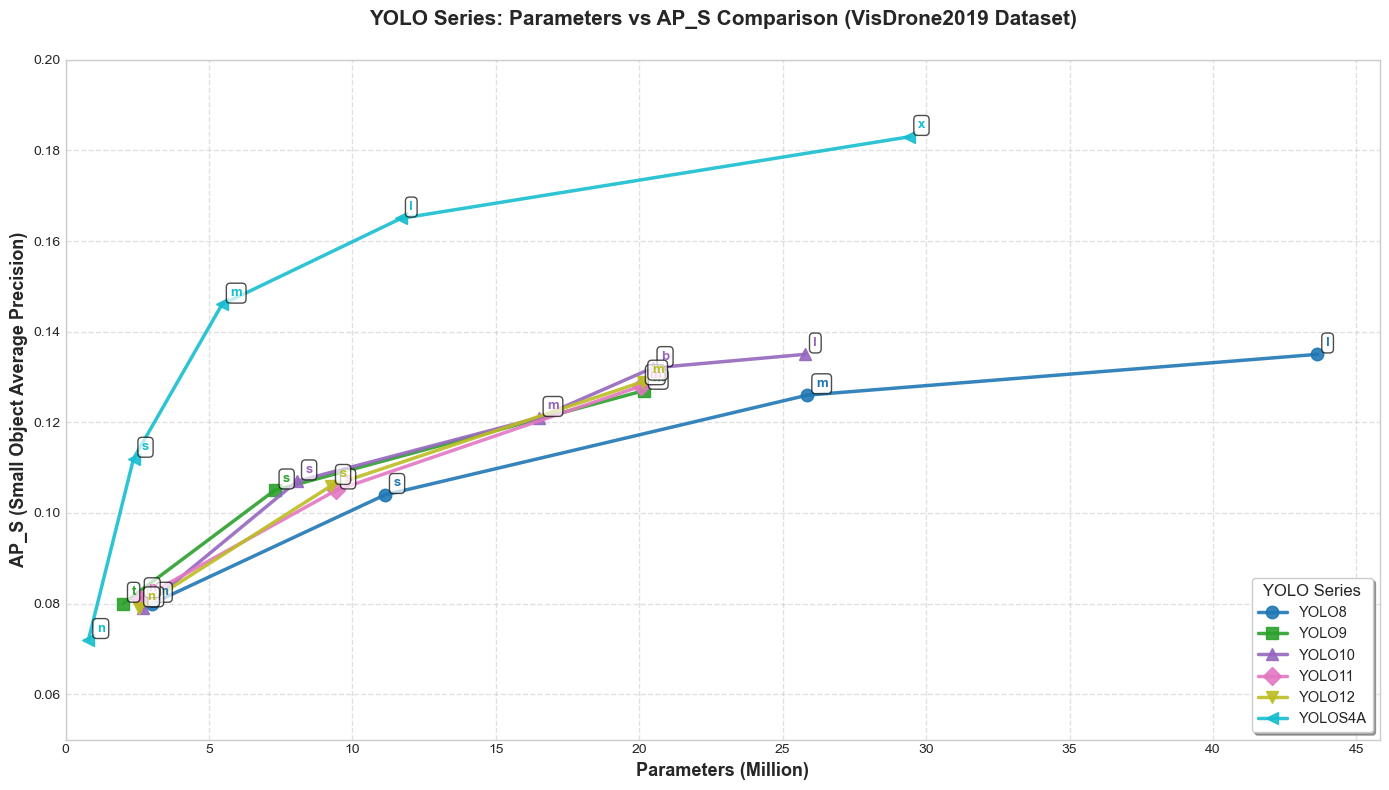


图表已保存为：yolo_ap_s_from_csv.png


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# -------------------------- 1. 从CSV读取数据（核心修改部分） --------------------------
# 替换为你的CSV文件路径（两种路径格式均可）
# 方式1：绝对路径（Windows示例，注意用双反斜杠\\或单正斜杠/）
# csv_path = "C:/Users/YourName/Desktop/yolo_experiment_data.csv"
# 方式2：相对路径（CSV文件与代码放在同一文件夹时，直接写文件名）
csv_path = "./res.csv"

# 读取CSV文件（若CSV含中文，需添加 encoding='utf-8-sig'，如：pd.read_csv(csv_path, encoding='utf-8-sig')）
df = pd.read_csv(csv_path,encoding='gbk')

# （可选但推荐）检查数据是否读取成功：打印前5行和关键列信息，避免列名不匹配
print("数据读取成功，前5行数据：")
print(df.head())
print("\n关键列是否存在？")
required_columns = ["Model", "数据集", "Parameters (M)", "AP_S"]  # 必须包含的列
for col in required_columns:
    print(f"- {col}: {'存在' if col in df.columns else '不存在！请检查CSV列名'}")

# -------------------------- 2. 系列分组（与之前逻辑一致，适配分辨率） --------------------------
def get_series(model_name):
    # 区分YOLOS4A的640/1024分辨率系列
    if "_640" in model_name or "_1024" in model_name:
        res_suffix = "_640" if "_640" in model_name else "_1024"
        base_series = model_name.replace(res_suffix, "").rstrip("nstmlx")
        return f"{base_series}{res_suffix}"
    # 普通模型分组（如YOLOv8n → YOLOv8）
    for i, c in enumerate(model_name):
        if c.islower() or c in ['t', 'b', 'x']:
            return model_name[:i]
    return model_name

# 生成系列标签
df['Series'] = df['Model'].apply(get_series)

# -------------------------- 3. 绘图配置与执行（与之前逻辑一致） --------------------------
# 绘图样式
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# 颜色与标记（适配多系列）
series_list = df['Series'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(series_list)))
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h'] * 3

# 绘制折线图
for i, series in enumerate(series_list):
    # 按参数量排序，确保折线顺序正确
    series_data = df[df['Series'] == series].sort_values(by='Parameters (M)')

    plt.plot(
        series_data['Parameters (M)'],  # 横轴：CSV中的“参数量（million）”列
        series_data['AP_S'],             # 纵轴：CSV中的“AP_S”列
        label=series,
        color=colors[i],
        marker=markers[i],
        markersize=9,
        linewidth=2.5,
        alpha=0.9
    )

    # 添加型号后缀标注（带白色背景框，避免遮挡）
    for _, row in series_data.iterrows():
        if "_640" in row['Model'] or "_1024" in row['Model']:
            suffix = row['Model'].replace(series, "").replace("_640", "").replace("_1024", "")
        else:
            suffix = row['Model'][len(series):]

        plt.annotate(
            suffix,
            xy=(row['Parameters (M)'], row['AP_S']),
            xytext=(6, 6),
            textcoords='offset points',
            fontsize=9.5,
            fontweight='bold',
            color=colors[i],
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
        )

# 坐标轴与标题（英文标注）
plt.xlabel('Parameters (Million)', fontsize=13, fontweight='bold')
plt.ylabel('AP_S (Small Object Average Precision)', fontsize=13, fontweight='bold')
plt.title('YOLO Series: Parameters vs AP_S Comparison (VisDrone2019 Dataset)',
          fontsize=15, fontweight='bold', pad=25)

# 坐标轴优化
plt.xlim(0, df['Parameters (M)'].max() * 1.05)
plt.ylim(0.05,0.20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # 横轴整数刻度
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}'))  # AP_S保留2位小数

# 图例（避免遮挡）
plt.legend(
    title='YOLO Series',
    title_fontsize=12,
    fontsize=10.5,
    loc='lower right',
    frameon=True,
    fancybox=True,
    shadow=True
)

# 网格
plt.grid(linestyle='--', alpha=0.6, linewidth=1)

# 保存为500dpi高清图片
plt.tight_layout()
plt.savefig(
    'yolo_ap_s_from_csv.png',
    dpi=500,
    bbox_inches='tight',
    facecolor='white'
)
plt.show()
print("\n图表已保存为：yolo_ap_s_from_csv.png")

✅ 筛选后保留的模型：
['YOLO8n', 'YOLO8s', 'YOLO8m', 'YOLO8l', 'YOLO9t', 'YOLO9s', 'YOLO9m', 'YOLO10n', 'YOLO10s', 'YOLO10m', 'YOLO10b', 'YOLO10l', 'YOLO11n', 'YOLO11s', 'YOLO11m', 'YOLO12n', 'YOLO12s', 'YOLO12m', 'YOLOS4An', 'YOLOS4As', 'YOLOS4Am', 'YOLOS4Al', 'YOLOS4Ax']
✅ 共23个模型（已排除1024版本）



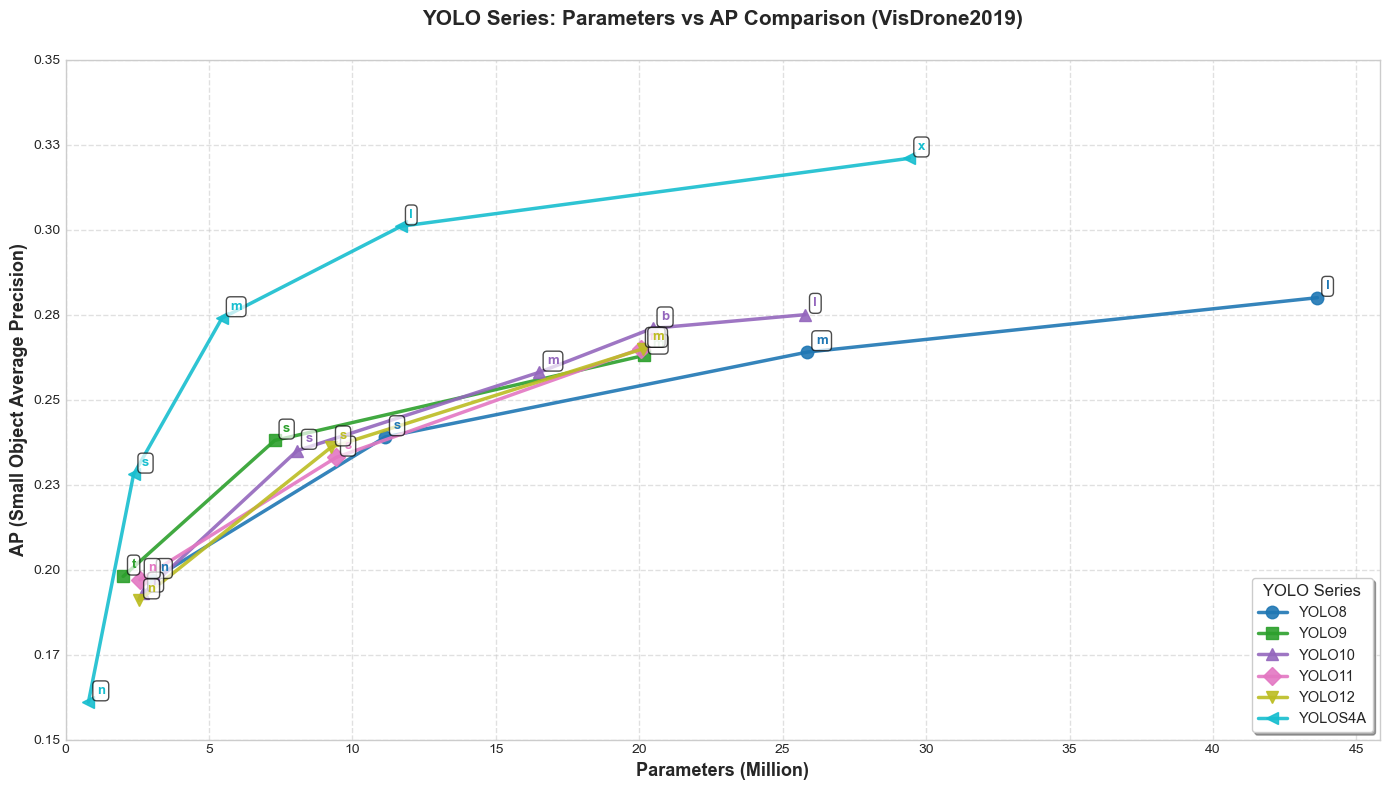

✅ 图表已保存为：yolo_AP_exclude_1024.png


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# -------------------------- 1. 读取CSV并筛选数据（核心：排除1024版本） --------------------------
csv_path = "./res.csv"  # 你的CSV文件路径
# 读取CSV（根据实际编码选择gbk或utf-8-sig，之前解决过的编码问题保持一致）
try:
    df = pd.read_csv(csv_path, encoding='gbk')  # Excel默认编码
except:
    df = pd.read_csv(csv_path, encoding='utf-8-sig')  # UTF-8编码

# 筛选：排除Model名称中包含"1024"的行（确保无1024版本）
df_filtered = df[~df['Model'].str.contains('1024', na=False)]  # ~表示"取反"，na=False避免空值报错

# 验证筛选结果：打印所有保留的模型名称，确认无1024版本
print("✅ 筛选后保留的模型：")
print(df_filtered['Model'].tolist())
print(f"✅ 共{len(df_filtered)}个模型（已排除1024版本）\n")

# -------------------------- 2. 简化系列分组（适配无分辨率后缀的YOLOS4A） --------------------------
def get_series(model_name):
    # 提取系列名（如YOLOv8n→YOLOv8，YOLOS4An→YOLOS4A，无分辨率后缀需简化）
    # 匹配小写字母（n/s/m/l）或特殊后缀（t/b/x），截取前面的系列名
    for i, c in enumerate(model_name):
        if c.islower() or c in ['t', 'b', 'x']:
            return model_name[:i]
    return model_name

# 生成系列标签（如YOLOS4An→YOLOS4A，YOLO9t→YOLO9）
df_filtered['Series'] = df_filtered['Model'].apply(get_series)

# -------------------------- 3. 绘制AP_S对比图（全英文标注+500dpi） --------------------------
# 绘图样式
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# 颜色与标记（适配筛选后的系列，如YOLOv8/9/10/11/12/YOLOS4A）
series_list = df_filtered['Series'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(series_list)))  # 区分度高的颜色
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p'] * 2

# 按系列绘制折线图（按参数量排序，确保折线连贯）
for i, series in enumerate(series_list):
    series_data = df_filtered[df_filtered['Series'] == series].sort_values(by='Parameters (M)')

    # 绘制折线
    plt.plot(
        series_data['Parameters (M)'],  # 横轴：参数量
        series_data['AP'],             # 纵轴：AP_S（小目标性能）
        label=series,
        color=colors[i],
        marker=markers[i],
        markersize=9,
        linewidth=2.5,
        alpha=0.9
    )

    # 添加型号后缀标注（如n/s/m，带白色背景框避免遮挡）
    for _, row in series_data.iterrows():
        suffix = row['Model'][len(series):]  # 提取后缀（如YOLOv8n→"n"）
        plt.annotate(
            suffix,
            xy=(row['Parameters (M)'], row['AP']),
            xytext=(6, 6),
            textcoords='offset points',
            fontsize=9.5,
            fontweight='bold',
            color=colors[i],
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
        )

# 全英文坐标轴与标题
plt.xlabel('Parameters (Million)', fontsize=13, fontweight='bold')
plt.ylabel('AP (Small Object Average Precision)', fontsize=13, fontweight='bold')
plt.title('YOLO Series: Parameters vs AP Comparison (VisDrone2019)',
          fontsize=15, fontweight='bold', pad=25)  # 标题注明"排除1024分辨率"

# 坐标轴优化
plt.xlim(0, df_filtered['Parameters (M)'].max() * 1.05)  # 横轴留余量
plt.ylim(0.15,0.35)              # 纵轴留余量
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # 横轴整数刻度
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}'))  # AP_S保留2位小数

# 图例（修改为框图内右下角）
plt.legend(
    title='YOLO Series',
    title_fontsize=12,
    fontsize=10.5,
    loc='lower right',  # 图例位置：右下角
    frameon=True,
    fancybox=True,
    shadow=True
)

# 网格（辅助读取数据）
plt.grid(linestyle='--', alpha=0.6, linewidth=1)

# 保存为500dpi高清图片（注明排除1024版本，避免混淆）
plt.tight_layout()
plt.savefig(
    'yolo_AP_exclude_1024.png',
    dpi=500,
    bbox_inches='tight',
    facecolor='white'
)
plt.show()
print("✅ 图表已保存为：yolo_AP_exclude_1024.png")
